## BeautifulSoup Basic examples

Install these libraries:
```
! pip install bs4
! pip install requests
! pip install lxml
```

In [1]:
from bs4 import BeautifulSoup
import requests

### Find elements using tags
`soup.find(tag_name)`: This function finds the first element in the HTML document that matches the given tag name.

`soup.find_all(tag_name)`: This function is used to find all occurrences of a specific HTML tag within the document. It returns a list of all the matching elements.

In [44]:
text = """
<!DOCTYPE html>
<html>
<head>
  <title>My First HTML Page</title>
</head>
<body>
  <h1 class="title">Welcome to My Website!</h1>
</body>
</html>
"""

In [45]:
soup = BeautifulSoup(text, "lxml")
soup.find('h1')

<h1 class="title">Welcome to My Website!</h1>

In [46]:
# note that fins_all give you a list
soup.find_all('h1')

[<h1 class="title">Welcome to My Website!</h1>]

In [49]:
text = """
<!DOCTYPE html>
<html>
<head>
  <title>My Repeated Tags Example</title>
</head>
<body>
  <h2>Repeating Tags Example</h2>
  <p>This is a paragraph.</p>
  <p>This is another paragraph.</p>
  <ul>
    <li>List item 1</li>
    <li>List item 2</li>
    <li>List item 3</li>
  </ul>
  <li> JAJAJA </li>
</body>
</html>
"""

In [50]:
soup = BeautifulSoup(text, "lxml")
soup.find_all('p')

[<p>This is a paragraph.</p>, <p>This is another paragraph.</p>]

In [51]:
soup.find_all('li')

[<li>List item 1</li>,
 <li>List item 2</li>,
 <li>List item 3</li>,
 <li> JAJAJA </li>]

**Question**: How to find the list elements inside the "ul" tag and avoid other "li" tags? </br>
Hint: first extract the ul part of the doc.

### Find elements using attributes

In [52]:
html_doc = """
<html>
<head><title>Example Page</title></head>
<body>
    <div class="container">
        <p id="first" class="text">This is the first paragraph.</p>
        <p id="second" class="text">This is the second paragraph.</p>
        <a href="https://www.example.com" id="link1">Example Link 1</a>
        <a href="https://www.example.org" id="link2" class="external">Example Link 2</a>
    </div>
</body>
</html>
"""


In [53]:
soup = BeautifulSoup(html_doc, 'html.parser')

# Find an element by id
element_by_id = soup.find('p', {'id': 'first'})
element_by_id

<p class="text" id="first">This is the first paragraph.</p>

In [54]:
# To get the text
element_by_id.text

'This is the first paragraph.'

In [55]:
element_by_class = soup.find('a', {'class': 'external'})
element_by_class

<a class="external" href="https://www.example.org" id="link2">Example Link 2</a>

In [59]:
# accessing values for specific attributes
element_by_class["href"], element_by_class["id"]

('https://www.example.org', 'link2')

In [62]:
# looping through all attributes
element = soup.find('a')
[attr for attr in element.attrs]

['href', 'id']

In [60]:
element_by_multiple_attrs = soup.find('a', {'id': 'link2', 'class': 'external'})
element_by_multiple_attrs 

<a class="external" href="https://www.example.org" id="link2">Example Link 2</a>

## Getting Covid data with BeautifulSoup

Let's figure out how to scrape some [data on the coronavirus from Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory).

### Inspect the first table element

Using Chrome, go to URL:

[https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory)

And inspect the source code.

### Get the raw HTML from the website

In [77]:
CovidURL = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
response = requests.get(CovidURL)
print(response.text[0:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>COVID-19 pandemic by country and territory - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinne

### Get specific tag using BeautifulSoup

Now let's treat the text as HTML not just English text.  Then we can ask for a specific tag such as the title:

In [78]:
soup = BeautifulSoup(response.text, "lxml")
title = soup.find('title')
print("TITLE", title)

TITLE <title>COVID-19 pandemic by country and territory - Wikipedia</title>


###  Get all text elements from all HTML tags

We can also ask for all of the text elements not inside HTML tags:

In [26]:
soup.text[:5000]

'\n\n\nCOVID-19 pandemic by country and territory - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAppearance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\n Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1\nMaps and timelines\n\n\n\n\nToggle Maps and timelines subsection\n\n\n\n\n\n1.1\nTotal cases\n\n\n\n\n\n\n\n\n1.2\nTotal death

In [33]:
clean_text = " ".join(soup.text.split())
clean_text[:500]

'COVID-19 pandemic by country and territory - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn to editCommunity portalRecent changesUpload file Search Search Appearance Create account Log in Personal tools Create account Log in Pages for logged out editors learn more ContributionsTalk Contents move to sidebar hide (Top) 1 Maps and timelines Toggle Maps and timelines subse'

### Find all tables

BeautifulSoup has a mechanism to find all of the tables (HTML `table` text) in an HTML document:

In [36]:
tables = soup.find_all('table')
t = str(tables[0])

In [37]:
len(tables)

69

That is raw HTML representing the table, but we can use a Jupyter notebook trick to display that text as HTML:

In [38]:
from IPython.display import HTML # IPython is the underlying Python interpreter used by this notebook
HTML(t)                          # Render the text in t as HTML

Let's get table one in a different way.

In [39]:
tables1 = soup.find_all("table", class_="infobox")

In [40]:
len(tables1)

1

In [41]:
# check that you get the same
HTML(str(tables1[0]))

In [24]:
#tables1[0]

In [27]:
[el.text for el in tables1[0].find_all("tr")[-3:]]

['Confirmed cases769,805,366[6]',
 'Deaths6,955,484[6]',
 'Vaccinations5,621,332,009[6] (total vaccinated)5,169,098,781[6] (fully vaccinated)13,501,253,518[6] (doses administered)']

In [28]:
for el in tables1[0].find_all("tr")[-3:]:
    print(el.find('th').text, el.find('td').text)

Confirmed cases 769,805,366[6]
Deaths 6,955,484[6]
Vaccinations 5,621,332,009[6] (total vaccinated)5,169,098,781[6] (fully vaccinated)13,501,253,518[6] (doses administered)


### Death rate table

The death rate per country table is `table[12]` (found by looking at captions) and we get a nice data frame from it too:

In [42]:
len(tables)

69

In [68]:
# let's try to find the right table
# can we find a unique id?
for i in range(69):
    table = tables[i]
    print(i, table.find("caption"), table["class"])

0 None ['infobox']
1 None ['wikitable']
2 None ['wikitable']
3 None ['wikitable']
4 None ['wikitable']
5 None ['wikitable']
6 None ['wikitable']
7 None ['wikitable']
8 None ['wikitable']
9 None ['wikitable']
10 None ['wikitable']
11 None ['wikitable']
12 <caption><a href="/wiki/COVID-19" title="COVID-19">COVID-19</a> cases, deaths, and rates by <a class="mw-selflink selflink">location</a><sup class="reference" id="cite_ref-Template:COVID-19_datab_27-0"><a href="#cite_note-Template:COVID-19_datab-27"><span class="cite-bracket">[</span>22<span class="cite-bracket">]</span></a></sup>
</caption> ['wikitable', 'sortable', 'sort-under', 'mw-datatable', 'plainrowheaders', 'sticky-table-row1', 'sticky-table-col2']
13 <caption>2022 monthly cumulative COVID-19 deaths<sup class="reference" id="cite_ref-WHO-csv_32-0"><a href="#cite_note-WHO-csv-32"><span class="cite-bracket">[</span>24<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-WHO-dashboard_33-0"><a href="#cit

In [69]:
# this is one way to do it
table = tables[12]

In [80]:
# a different way
# 1. Find the caption with a specific id.
# 2. Find the parent of caption that is a table
sup_table = soup.find(id="cite_ref-Template:COVID-19_datab_27-0")
sup_table

<sup class="reference" id="cite_ref-Template:COVID-19_datab_27-0"><a href="#cite_note-Template:COVID-19_datab-27"><span class="cite-bracket">[</span>22<span class="cite-bracket">]</span></a></sup>

In [82]:
# # Find the parent table of sub
table = sup_table.find_parent('table')
# checking that is the right table
table.find("caption").text

'COVID-19 cases, deaths, and rates by location[22]\n'

In [84]:
#Look at table
#table
tbody = table.find("tbody")
#tbody

### Getting column names
Note that column names have attribute scope="col"

In [85]:
header = tbody.find_all("th", {"scope": "col"})
header

[<th scope="col">Country
 </th>,
 <th scope="col"><abbr title="Deaths per million">Deaths / million</abbr>
 </th>,
 <th scope="col">Deaths
 </th>,
 <th scope="col">Cases
 </th>]

In [86]:
cols_names = [col.text.strip().replace(" ", "")  for col in header]
cols_names

['Country', 'Deaths/million', 'Deaths', 'Cases']

In [87]:
len(cols_names)

4

### Getting rows
Note that rows have attribute scope="row"

In [88]:
rows = tbody.find_all("tr")

In [89]:
rows[0]

<tr>
<th class="unsortable">
</th>
<th scope="col">Country
</th>
<th scope="col"><abbr title="Deaths per million">Deaths / million</abbr>
</th>
<th scope="col">Deaths
</th>
<th scope="col">Cases
</th></tr>

In [90]:
len(rows)

241

In [91]:
rows[1]

<tr class="sorttop static-row-header">
<td data-sort-value="World" style="text-align: center;"><span typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/16px-OOjs_UI_icon_globe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/24px-OOjs_UI_icon_globe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/32px-OOjs_UI_icon_globe.svg.png 2x" width="16"/></span></span>
</td>
<th scope="row" style="background-color: inherit;"><a href="/wiki/COVID-19_pandemic" title="COVID-19 pandemic">World</a><sup class="reference" id="cite_ref-28"><a href="#cite_note-28"><span class="cite-bracket">[</span>a<span class="cite-bracket">]</span></a></sup>
</th>
<td data-sort-value="883.329">883
</td>
<td data-sort-value="7057132">7,057,132
</td>
<td data-sort-value="775866783">

In [92]:
rows[1].find_all("td")

[<td data-sort-value="World" style="text-align: center;"><span typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/16px-OOjs_UI_icon_globe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/24px-OOjs_UI_icon_globe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/32px-OOjs_UI_icon_globe.svg.png 2x" width="16"/></span></span>
 </td>,
 <td data-sort-value="883.329">883
 </td>,
 <td data-sort-value="7057132">7,057,132
 </td>,
 <td data-sort-value="775866783">775,866,783
 </td>]

In [93]:
[elm["data-sort-value"] for elm in rows[1].find_all("td")]

['World', '883.329', '7057132', '775866783']

In [61]:
# We need to skip this row
#rows[240]

In [94]:
col1 = []; col2 = []; col3 = []; col4 = [] 
for i in range(1, 240): # for row in rows
    row = [elm["data-sort-value"] for elm in rows[i].find_all("td")]
    col1.append(row[0])
    col2.append(row[1])
    col3.append(row[2])
    col4.append(row[3])

### Put data in a dataframe

In [95]:
import pandas as pd
import numpy as np
cols_names

['Country', 'Deaths/million', 'Deaths', 'Cases']

In [96]:
col2 = np.array(col2, np.float32) 
col3 = np.array(col3, np.float32) 
col4 = np.array(col4, np.float32) 

In [97]:
df = pd.DataFrame({'Country': col1, 'Deaths/million': col2, 'Deaths': col3, 'Cases': col4})

In [98]:
df.head()

,Country,Deaths/million,Deaths,Cases
0,World,883.328979,7057132.0,775866752.0
1,Peru,6601.109863,220975.0,4526977.0
2,Bulgaria,5669.612793,38700.0,1329988.0
3,North Macedonia,5422.130859,9978.0,350924.0
4,Bosnia and Herzegovina,5114.819824,16392.0,403666.0


As with any data frame, we can sort values and select columns of interest:

In [99]:
df_death_rate = df[['Country', 'Deaths/million']].sort_values('Deaths/million', ascending=False)
df_death_rate.head(10)

,Country,Deaths/million
1,Peru,6601.109863
2,Bulgaria,5669.612793
3,North Macedonia,5422.130859
4,Bosnia and Herzegovina,5114.819824
5,Hungary,5065.206055
6,Croatia,4799.551758
7,Slovenia,4766.857910
8,Georgia,4519.361816
9,Montenegro,4317.903809
10,Czech Republic,4076.466064


Once we have a nice data structure like a data frame, it's very easy to build a plot, which is sometimes more satisfying than what we see in some report where we got the data.

In [100]:
df = df.sort_values('Deaths', ascending=False)
df = df.head(30).reset_index(drop=True)
df

,Country,Deaths/million,Deaths,Cases
0,World,883.328979,7057132.0,775866752.0
1,European Union,2812.179932,1262988.0,185822592.0
2,United States,3493.545898,1193165.0,103436832.0
3,Brazil,3338.538086,702116.0,37511920.0
4,India,374.360992,533623.0,45041748.0
5,Russia,2769.531006,403188.0,24268728.0
6,Mexico,2601.219971,334551.0,7619458.0
7,United Kingdom,3404.434082,232112.0,24974628.0
8,Peru,6601.109863,220975.0,4526977.0
9,Italy,3309.458984,197307.0,26781078.0


In [101]:
# cut the World and the European union
df = df.iloc[2:].copy()
countries = df['Country'].values
deaths = df['Deaths']

### Plotting

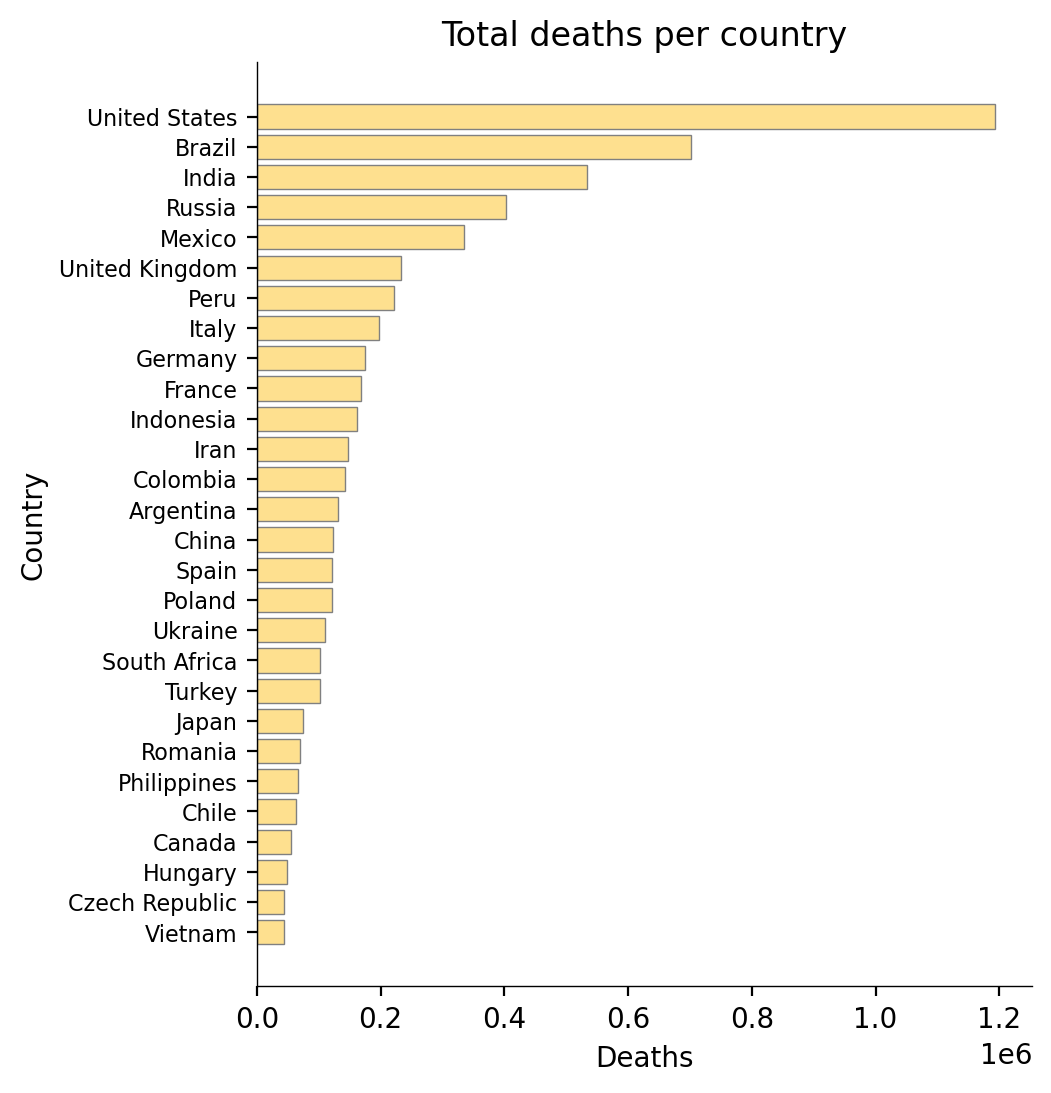

In [102]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(1, 1, figsize=(5,6))
y_pos = np.arange(len(countries))
barcontainers = ax.barh(y_pos, deaths, color='#FEE08F')
ax.invert_yaxis() 
ax.set_yticks(y_pos)
ax.set_yticklabels(countries, fontsize=8, horizontalalignment="right")

for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.set_title("Total deaths per country")
ax.set_xlabel("Deaths")
ax.set_ylabel("Country")

plt.show()